### LOAN ELIGIBILITY INDICATOR

#### PROBLEM STATEMENT

Financial institutions receive thousands of loan applications every month. Manually evaluating each application for eligibility is time-consuming, inconsistent, and prone to human error. A data-driven solution is required to streamline the loan approval process by automatically predicting an applicant's loan eligibility based on historical data and applicant attributes.

The goal of this project is to build a predictive model using machine learning techniques to determine whether a loan application should be approved or denied. The model will be trained on past loan data that includes demographic information, employment status, income details, credit history, and loan parameters.

This tool will assist loan officers in making informed, consistent, and faster decisions, reducing the risk of default and improving customer experience.



### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data_file/loan-test.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
data.shape


(367, 12)

### DATASET INFORMATION

- Loan Id -> id of the Loab Applicant
- Gender -> It specifies the Gender
- Married -> Marriage status
- Dependents -> Number of individuals financially dependent on the borrower
- Education -> Educational Qualification
- Self_employed -> Is the Applicant self employed 
- ApplicantIncome -> Speciifies the income of Applicant
- CoapplicantIncome -> Monthly income of the coapplicant
- Loan Amount -> Amount of Loan Applicant want
- Loan Amount Term -> Specifies the Term of Loan to be cleared
- Credit history -> Credit history of the Applicant 
- Property Area -> Property area of the Applicant

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
# CHECKING THE MISSING VALUES

data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
# Handling the missing values

# Fill categorical columns with mode
categorical_cols = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numerical columns 
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [9]:
#The missing values have been Handled

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
# CHECKING DUPLICATES

data.duplicated().sum()

np.int64(0)

In [11]:
# CHECK NULL AND DTYPES

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
#CHECKING THE NO. OF UNIQUE VALUES

data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

### EXPLORING THE DATA

In [ ]:
# Displaying unique categories for each categorical variable

print("Categories in 'Gender' variable:  ",end=" ")
print(data['Gender'].unique())

print("Categories in'Married' variable:  ", end=" ")
print(data['Married'].unique())

print("Categories in 'Education' variable:  ", end=" ")
print(data['Education'].unique())

print("Categories in 'Self_Employed' variable:  ", end=" ")
print(data['Self_Employed'].unique())

print("Catogories in 'Peoperty_Area' variable: ", end=" ")
print(data["Property_Area"].unique())

Categories in 'Gender' variable:   ['Male' 'Female']
Categories in'Married' variable:   ['Yes' 'No']
Categories in 'Education' variable:   ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:   ['No' 'Yes']
Catogories in 'Peoperty_Area' variable:  ['Urban' 'Semiurban' 'Rural']


In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [22]:
# Define numerical and Categorical Columns

numeric_features=[feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} Categorical features: {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 7 Categorical features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


### HISTOGRAM AND KDE

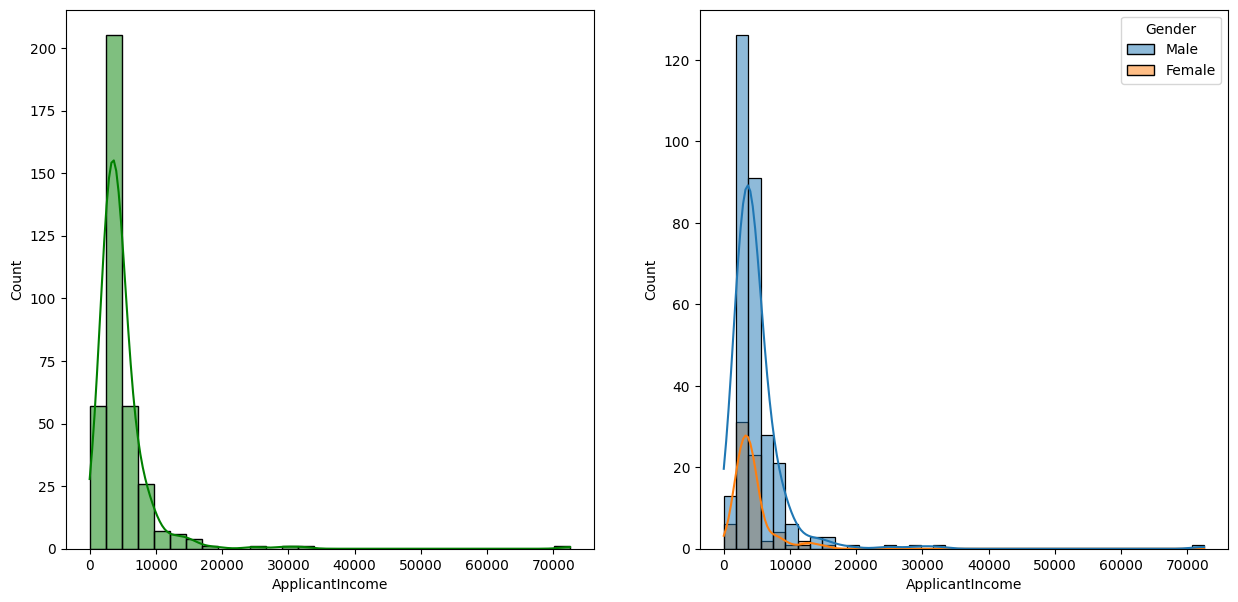

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=data, x='ApplicantIncome', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=data, x='ApplicantIncome', kde=True, hue='Gender')

plt.show()


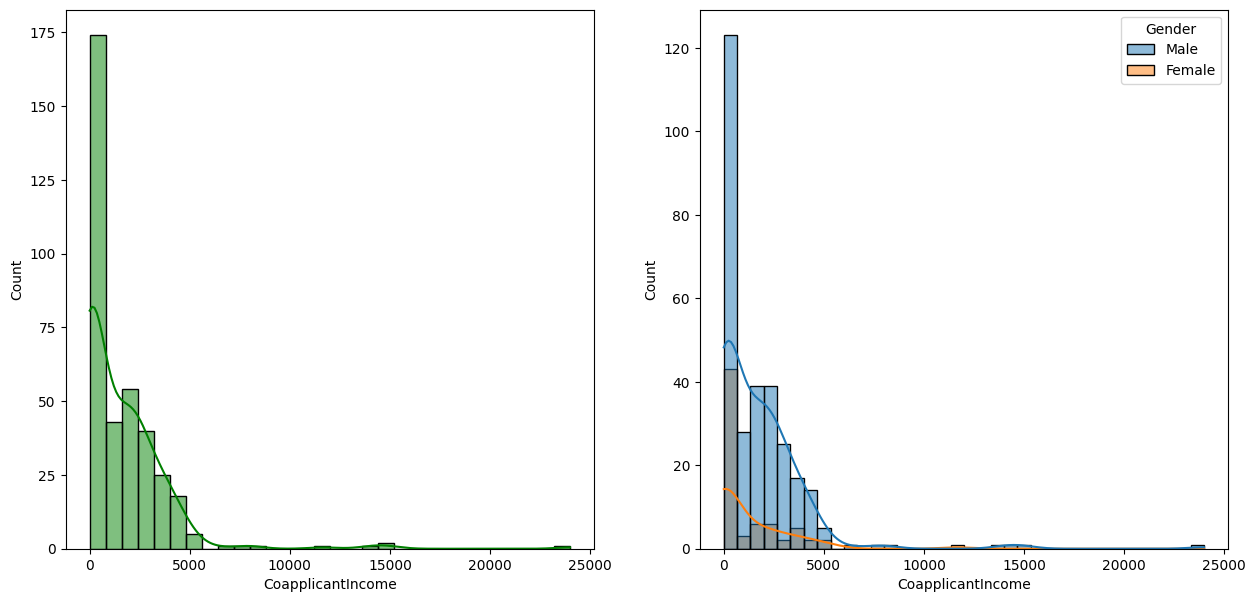

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=data, x='CoapplicantIncome', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=data, x='CoapplicantIncome', kde=True, hue='Gender')

plt.show()


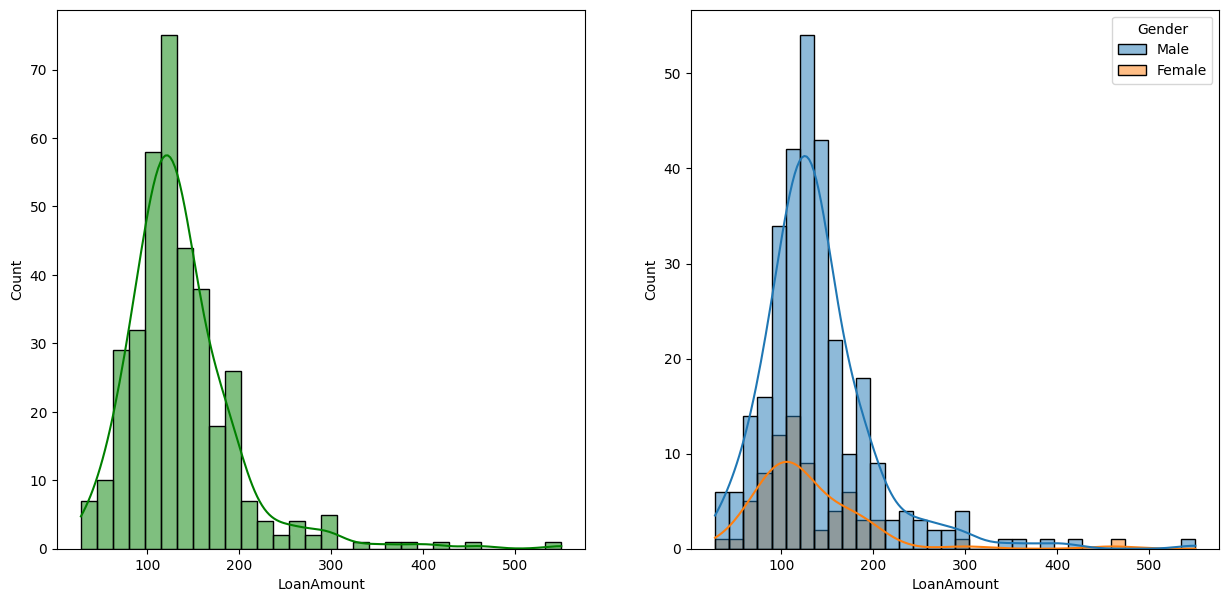

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=data, x='LoanAmount', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=data, x='LoanAmount', kde=True, hue='Gender')

plt.show()


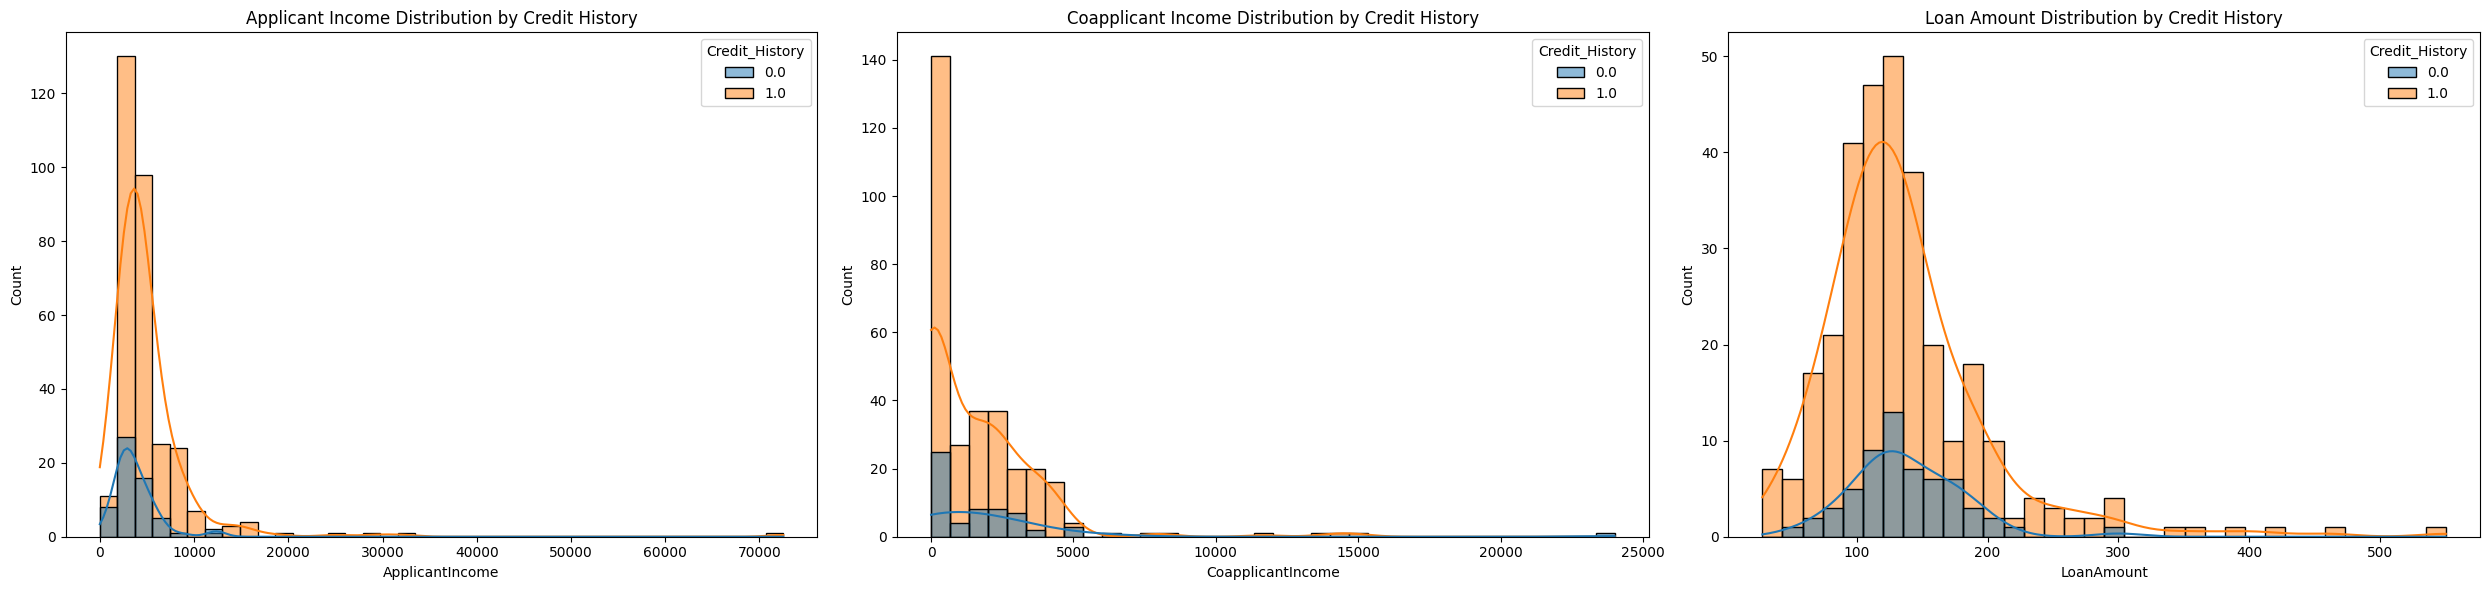

In [31]:


plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=data, x='ApplicantIncome', kde=True, hue='Credit_History')
plt.title('Applicant Income Distribution by Credit History')

plt.subplot(132)
sns.histplot(data=data, x='CoapplicantIncome', kde=True, hue='Credit_History')
plt.title('Coapplicant Income Distribution by Credit History')

plt.subplot(133)
sns.histplot(data=data, x='LoanAmount', kde=True, hue='Credit_History')
plt.title('Loan Amount Distribution by Credit History')

plt.tight_layout()
plt.show()

### INSIGHTS

##### IN THE FIRST 3 GRAPHS

- Males tends to be more then Females
- Both genders have most applicants with low income, but males have more spread across higher incomes.

##### IN THE LAST GRAPH
- In Applicant Income, Coapplicant Name and Loan Amount, there are significantly more applicants with a good credit history in the dataset than applicants with a poor credit history.

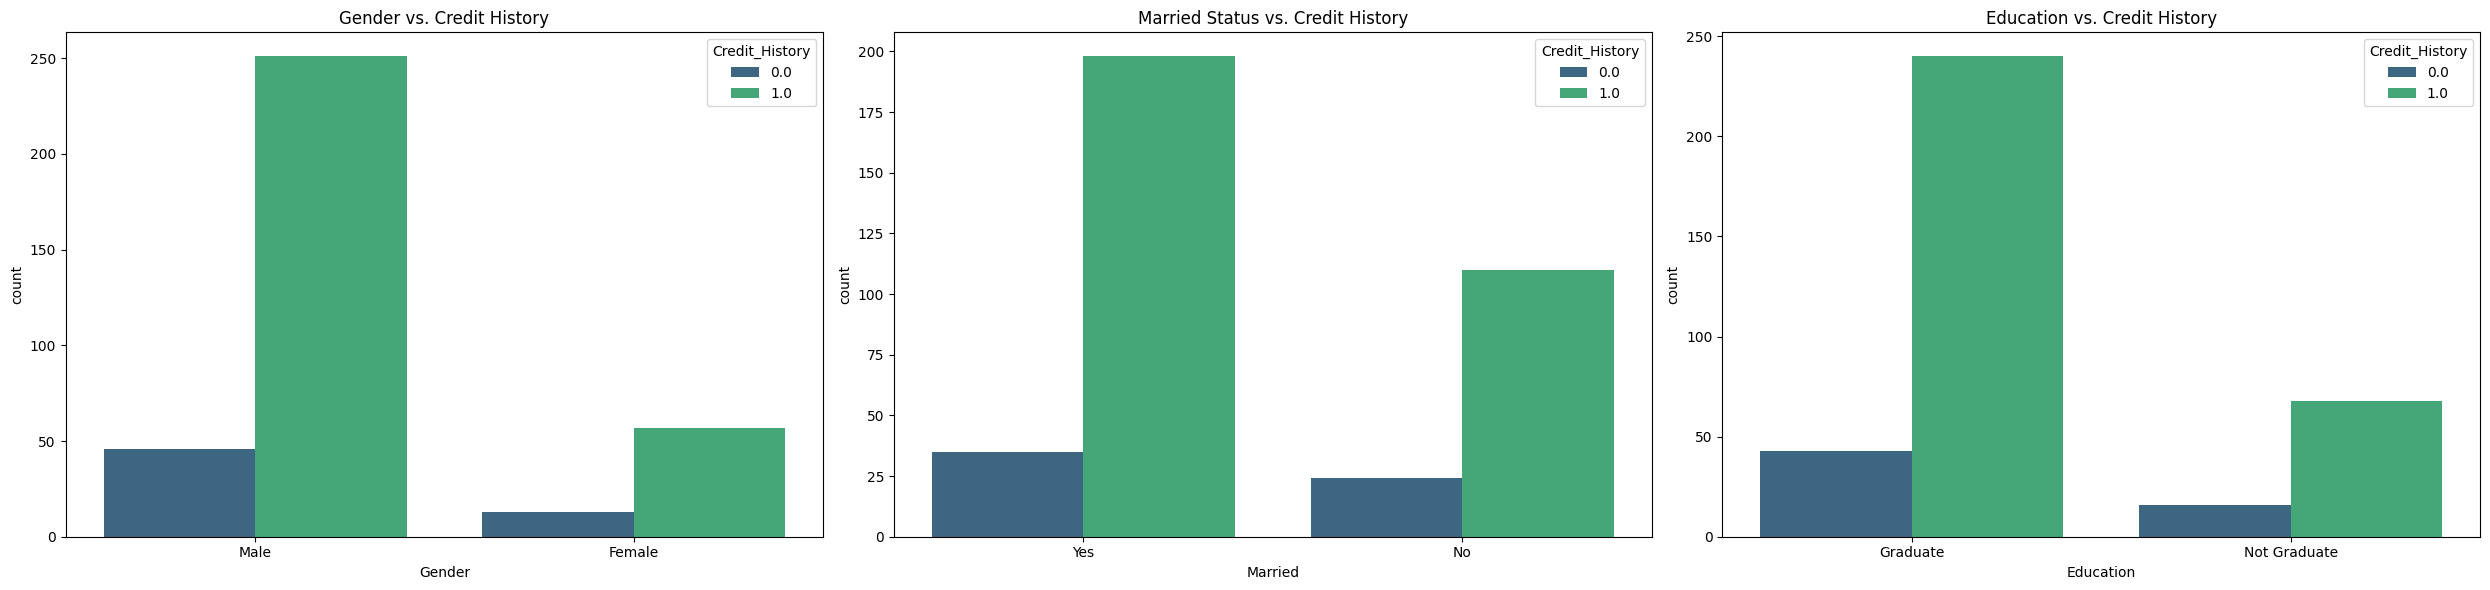

In [33]:


# Create the figure and subplots for categorical feature analysis
plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: Gender vs. Credit History
plt.subplot(131) 
sns.countplot(data=data, x='Gender', hue='Credit_History', palette='viridis')
plt.title('Gender vs. Credit History')

# Plot 2: Married vs. Credit History
plt.subplot(132) 
sns.countplot(data=data, x='Married', hue='Credit_History', palette='viridis')
plt.title('Married Status vs. Credit History')

# Plot 3: Education vs. Credit History
plt.subplot(133) 
sns.countplot(data=data, x='Education', hue='Credit_History', palette='viridis')
plt.title('Education vs. Credit History')

plt.tight_layout()
plt.show()

#### INSIGHTS FROM THE ABOVE GRAPH

- In Gender vs Credit score graph both Males and Females. The applicants with the good credit score are more then the bad credit score
- In Married State  vs Credit score graph both Married and Non Mardied. The applicants with the good credit score are more then the bad credit score
- Same goes for the Education and the credit score 